# Polynomial Regression

Rayan Crasta (stea1th9)

**Problem Statement**

Lets imagine we are an HR and we ant to hire , we found a great fit for the job .
But the question comes what is your salary expectiation 
he demands $160,000 per year in prev company
We are gonna build a plynomial regression to predict his previous salary to know wether its the truth of the bluff:

**Data Set:**

*   Positions 
*   Level
*   Salary 

We need to check which position this person had according to salary . 

But chance is he has been Regional Manager for Dunder Mifflin for quite a while. Hence his salary shouldnt be 150,000 but it should be between 150,000 to 160,000 i.e position level 6 and 7

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values 
#select only level column cuz its like the  encoded version of position
y = dataset.iloc[:,-1].values

## Training the Linear Regression model on the whole dataset

In [3]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [11]:
#now instead of x1 x2 and xn , we will have the x1^2 x2^2
from sklearn.preprocessing import PolynomialFeatures
ply_reg= PolynomialFeatures(degree=4) #x^4 max
X_poly= ply_reg.fit_transform(X)  
#X_poly is the x1 linearity is converted into a polynomial of degree 2 
linear_reg_2 = LinearRegression()
linear_reg_2.fit(X_poly,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

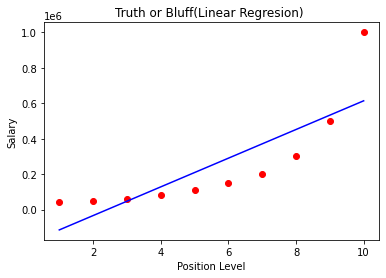

In [12]:
plt.scatter(X,y,color="red")
plt.plot(X,regressor.predict(X),color="blue")
plt.title("Truth or Bluff(Linear Regresion) ")
plt.xlabel('Position Level')
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results

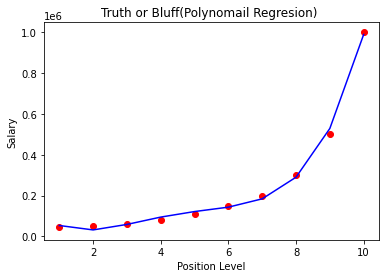

In [13]:
plt.scatter(X,y,color="red")
plt.plot(X,linear_reg_2.predict(X_poly),color="blue")
plt.title("Truth or Bluff(Polynomail Regresion) ")
plt.xlabel('Position Level')
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

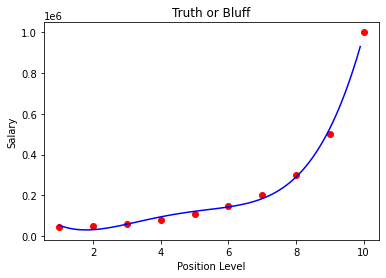

In [15]:
#as we have small Data set ,we will increase x vals plots
X_grid= np.arange(min(X),max(X),0.1)#create array at differnece of 0.1 cuz small dataset
X_grid= X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color="red")
plt.plot(X_grid,linear_reg_2.predict(ply_reg.fit_transform(X_grid)),color='blue')
plt.title('Truth or Bluff')
plt.xlabel('Position Level')
plt.ylabel("Salary")
plt.show()


## Predicting a new result with Linear Regression

In [19]:
regressor.predict([[6.5]])
#we are in loss cuz the person asked for 160,000 but we are getting 330,000

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [21]:
linear_reg_2.predict(ply_reg.fit_transform([[6.5]]))


array([158862.45265155])

#RESULTS

Here the linear rgeressor model **says 330,000** which is a bad prediction

But polynomail regression says **158K** which is similar to his demand 

Hence** we can hire **the person as Regional Manager of New York